# Example of Decision Trees (DT) implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score

In [2]:
# Function tha calculate the bit error rate (BER) of two vectors
def bit_error_rate(y_pred, y_test):
    # Convert the vectors to binary
    y_pred = np.unpackbits(np.uint8(y_pred))
    y_test = np.unpackbits(np.uint8(y_test))
    
    # Calculate the BER
    return np.sum(y_pred!=y_test)/len(y_pred)

# Function that calculate the symbol error rate (SER) of two vectors
def symbol_error_rate(y_pred, y_test):
    # Calculate the SER
    return np.sum(y_pred!=y_test)/len(y_pred)

## Data preparation

In [3]:
# Generate a random dataset with 2 classes
np.random.seed(0)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

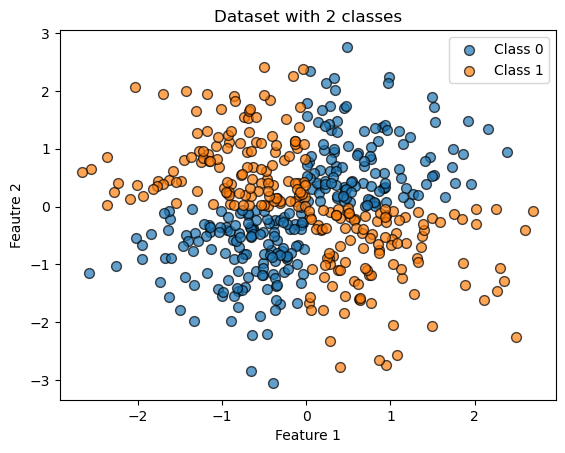

In [4]:
# Show the data in a scatter plot
plt.figure()
plt.title('Dataset with 2 classes')
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], s=50, label='Class %d' % i, alpha=0.7, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feautre 2')
plt.legend()
plt.show()

## Application of the DT method

### Calculate the best number of trees

In [5]:
# Grid search for the best parameters
parameters = {'max_depth': np.arange(1, 10), 'min_samples_leaf': np.arange(1, 10)}
grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)
grid.fit(X, y)
print('Best parameters: %s' % grid.best_params_)

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1}


### Calculate the BER, SER and Accuracy

In [6]:
model = DecisionTreeClassifier(**grid.best_params_)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
ber = 0
ser = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    ber += bit_error_rate(y_pred, y_test)
    ser += symbol_error_rate(y_pred, y_test)

print('BER:', ber/5)
print('SER:', ser/5)
print('Accuracy:', accuracy_score(y_pred, y_test))

BER: 0.00275
SER: 0.022
Accuracy: 0.99
